In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("features/mm_all.csv")

In [28]:
# Adding sqrt values for each column
for col in df.columns:
    # Make sure the column is numeric before applying sqrt
    if pd.api.types.is_numeric_dtype(df[col]):
        df[f'{col}_sqrt'] = np.sqrt(abs(df[col]))
        df[f'{col}_squared'] = np.square(df[col])


In [29]:
df.iloc[4:,:]

,Mol,Pol,Rad,CN,Ion,EN,Pol_sqrt,Pol_squared,Rad_sqrt,Rad_squared,CN_sqrt,CN_squared,Ion_sqrt,Ion_squared,EN_sqrt,EN_squared
4,Li,164.11,182,8,5.392,0.98,12.810543,26932.0921,13.490738,33124,2.828427,64,2.322068,29.073664,0.989949,0.9604
5,Al,57.80,184,12,5.986,1.61,7.602631,3340.8400,13.564660,33856,3.464102,144,2.446630,35.832196,1.268858,2.5921
6,Ni,49.00,163,12,7.640,1.91,7.000000,2401.0000,12.767145,26569,3.464102,144,2.764055,58.369600,1.382027,3.6481
7,Mn,68.00,197,8,7.434,1.55,8.246211,4624.0000,14.035669,38809,2.828427,64,2.726536,55.264356,1.244990,2.4025


In [30]:
%store -r res
res

[17.144355598718082,
 25.02717771580682,
 5.118879491233692,
 22.792844836933817,
 25.719392847659723,
 2.9222363463284893,
 10.553895436793855,
 15.857470042410599]

In [31]:
from sklearn.ensemble import ExtraTreesRegressor

In [32]:
model = ExtraTreesRegressor()
model.fit(df.iloc[5:,1:],res[5:])

ExtraTreesRegressor()

In [33]:
model.feature_importances_

array([0.00831562, 0.01164187, 0.01496811, 0.23174815, 0.01330499,
       0.01496811, 0.0066525 , 0.00831562, 0.00831562, 0.01663124,
       0.00997874, 0.33345379, 0.29343253, 0.01164187, 0.01663124])

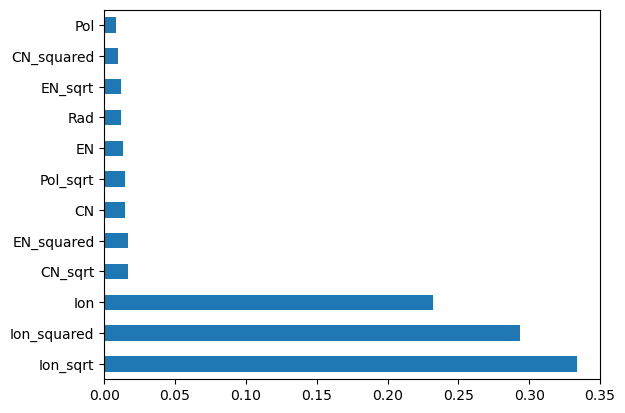

In [34]:
# plot the feature importances
feat_importances = pd.Series(model.feature_importances_, index=df.iloc[:,1:].columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()